# 5. Compressing Data via Dimensionality Reduction

- 저번 챕터: feature selection을 통하여 차원을 축소
- 이번 챕터: feature extraction: 정보를 요약하여 새로운 feature로 만듬으로서 차원을 축소하는 방법(세가지)

• Principal component analysis (PCA) 

• Linear Discriminant Analysis (LDA) 

• Nonlinear dimensionality reduction via kernel principal component analysis


## 1) Unsupervised dimensionality reduction via principal component analysis

- Feature Extraction의 장점: 연산 효율성 증가 / 차원의 저주 감소

---

- Principal component analysis(PCA)

1) Unsupervised linear transformation

2) 특성들 간의 상관성에 기초하여 데이터내의 패턴 발견

3) 고차원 데이터에서 최대분산을 찾아서 새로운 차원에 투영

---

- 2차원에서 1차원으로 축소

![Image](1.png)

x1과 x2는 둘다 중요해 보인다.

최대 Variance를 가지는 한축과 그에 직교하는 두 축으로 나눈다. 이를 Principal components(PC1/2)라고 한다. 

PC1을 한 축으로 한 일차원 공간에서는 많은 부분 정보량을 보존할 수 있다. 

---

- PCA로 차원축소

![Image](2.png)

기존에 d차원의 특성을 가지고 있던 X을

k차원의 부분공간으로 이동하기 위하여

dXk차원의 W함수를 곱한다. (nXd X dXk = nXk)

<W함수를 구하는게 문제>

최대 분산 PCA를 한축으로 삼음으로서 다른 PCA들은 서로 연관성이 없다는(직교라는) 전제 하에 최대 분산을 가진다. 

데이터 스케일에 민감하므로 정규화가 필수이다. 

---

- PCA의 과정

1) Standardize the d -dimensional dataset.

d차원 데이터 정규화


2) Construct the covariance matrix.

공분산 행렬


3) Decompose the covariance matrix into its eigenvectors and eigenvalues.

고유벡터와 고유값으로 분해


4) Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ( k ≤ d ).

큰 순으로 k개의 고유값 선택


5) Construct a projection matrix W from the "top" k eigenvectors.

가장 큰 k개의 고유값을 기준으로 투사행렬 W


6) Transform the d -dimensional input dataset X using the projection
matrix W to obtain the new k -dimensional feature subspace.

d차원 데이터 X에 W를 곱하여 K차원 부분공간으로 변환


### Total and explained variance (1~4steps)

- 저번 챕터에서 했던 와인 데이터셋으로 할 것임

1) Standardize the d -dimensional dataset.

- train:test = 7:3

- d차원 데이터 정규화(여기선 13)

In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

2) Construct the covariance matrix.

- 공분산 행렬(symmetric 13X13)

![Image](3.png)

각 샘플의 j feature와 k feature간의 상관관계를 모두 더한것. 정규화 했으므로 평균은 모두 0이다. 

![Image](10.png)

각 feature간의 공분산을 나타낸 행렬이 sigma이다(sum의미 아님!)

예시같은 경우에는 13X13 매트릭스가 된다. 

---

3) Decompose the covariance matrix into its eigenvectors and eigenvalues.

- 고유벡터와 고유값으로 분해

Σv = λv

Eigenvalue:λ(Scalar값)

Eigenvector:v(13X13행렬)

(Iλ-Σ)v=0(character equation)

det(Iλ-Σ)=0을 만드는 λ의 해 13가지 = Eigenvalues


In [3]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals) #1X13
#print('\nCovariance Matrix \n%s' % cov_mat) #13X13
#print('\nEigenvectors \n%s' % eigen_vecs) #13X13


Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


- 차원 축소: 고유벡터들의 부분집합만 선택(기준: 정보(분산)을 많이 가지고 있는 순서)

- 고유값은 고유벡터의 정도(magnitude)를 정의. 고유값을 내림차순으로 정리하고 큰순서로 K개의 고유값에 기반한 고유벡터를 선택

---

- variance explained

![Image](11.png)

총 고유값들중에 K개를 골라 분산들을 설명한 비율

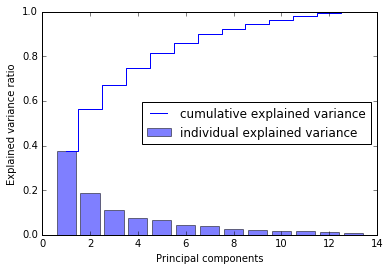

In [4]:
%matplotlib inline
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

- 결과

두개의 Principal component가 분산의 60%정도를 설명.

랜덤포레스트와 비슷하지만, PCA는 라벨을 준적이 없다. 

### Feature transformation (5~6step)

5) Construct a projection matrix W from the "top" k eigenvectors.

가장 큰 k개의 고유값을 기준으로 투사행렬 W

---

고유쌍 = 고유값+고유벡터

고유쌍을 내림차순으로 정렬


In [5]:
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
print(eigen_pairs)

[(4.8923083032737438, array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
        0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
        0.30032535,  0.36821154,  0.29259713])), (2.466350315759231, array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
        0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
       -0.27924322, -0.174365  ,  0.36315461])), (1.4280997275048446, array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
        0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
        0.09323872,  0.19607741, -0.09731711])), (1.0123346209044954, array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
        0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
        0.02417403,  0.18402864,  0.05676778])), (0.8490645933450256, array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
        0.14064543,  0.09268665, -0.08584168,  0.56

2개의 특성이 60%를 설명/나중에 시각화 위해 2가지 선택

(특성의 숫자는 연산효율과 성능의 Trade-off이 된다.)

In [6]:
w= np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


6) Transform the d -dimensional input dataset X using the projection
matrix W to obtain the new k -dimensional feature subspace.

d차원 데이터 X에 W를 곱하여 K차원 부분공간으로 변환

---
x: 1X13 표본 행벡터

x'=xW

x':우리가 얻은 새로운 2차원 표본 공간에서의 위치

---
X: nX13 표본 전체

X'=XW

X': 표본 전체 2차원 공간으로 이동

In [7]:
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

In [8]:
X_train_pca = X_train_std.dot(w)

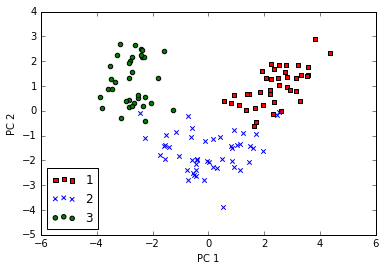

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers): 
    plt.scatter(X_train_pca[y_train==l, 0],X_train_pca[y_train==l, 1],c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

- 결과

x(첫번째 PCA)가 더 퍼져있는 것을 알 수 있다. 

선형 클래시파이어들이 잘 작동하게 생겼다. 

보기 쉽도록 라벨을 표시해 놓았지만, 비지도 학습이다!

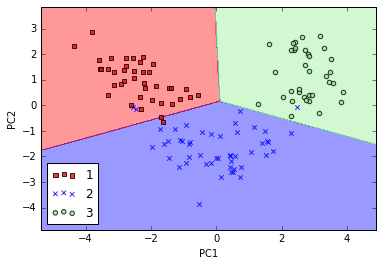

In [10]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

#반대로 보이는 이유는 고유값 절대값 취하기 때문에 달라지는것

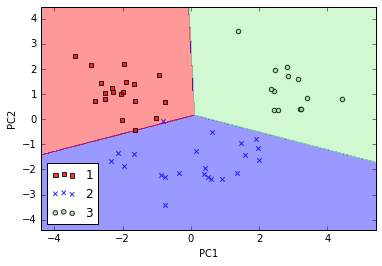

In [11]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [12]:
pca = PCA(n_components=None) #각 feature의 분산 기여도
X_train_pca = pca.fit_transform(X_train_std)
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[ 0.37329648  0.18818926  0.10896791  0.07724389  0.06478595  0.04592014
  0.03986936  0.02521914  0.02258181  0.01830924  0.01635336  0.01284271
  0.00642076]


0.99999999999999978

## 2) Supervised data compression via linear discriminant analysis

- Linear Discriminant Analysis (LDA) 

PCA와 개념이 유사하다

PCA: 최대 분산의 직교축들을 찾는것이 목표

PCA, LDA모두 선형변형을 한다. PCA는 unsupervised LDA는 Supervised

LDA가 우수할것이라고 믿기 쉽지만 어떤 경우의 이미지 인식이나 표본이 작을때 PCA가 우수하다고 한다. 

---

![Image](4.png)

x1(LD1): 구분 잘함

x2(LD2): 분산은 크지만 클래스 구분 불가

---

- 가정

데이터가 정규분포되어있다고 가정

클래스들이 같은 공분산을 가지고 있고 특성들이 통계적으로 독립되어있다고 가정

하지만 몇가지 위반되더라도 잘 작동한다.

---

- 과정

1) Standardize the d -dimensional dataset ( d is the number of features).

정규화

2) For each class, compute the d -dimensional mean vector.

평균벡터

3) Construct the between-class scatter matrix SB and the within-class scatter matrix Sw .

클래스간 분산/ 클래스내 분산

4) Compute the eigenvectors and corresponding eigenvalues of the matrix SW−1SB.

SW−1SB의 고유값과 고유벡터 구하기

5) Choose the k eigenvectors that correspond to the k largest eigenvalues to construct a d × k -dimensional transformation matrix W ; the eigenvectors are the columns of this matrix.

큰 순서로 k개 고유값을 골라 W를 형성

6) Project the samples onto the new feature subspace using the transformation matrix W .

투영

### Computing the scatter matrices (1~3 steps)

2) 클래스 별로 평균 벡터

![Image](5.png)



In [13]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [14]:
np.set_printoptions(precision=4)#소수점 네자리 까지
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0)) #y_train 중 label과 같은 sample들의 세로 평균을 구한다
    print('MB %s: %s\n' %(label, mean_vecs[label-1]))
# print(mean_vecs) [array([13])X3]

MB 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MB 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MB 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



![Image](6.png)


In [15]:
d = 13 # number of features
S_W = np.zeros((d, d)) #13X13 0행렬 생성
for label,mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d, d)) #13X13 0행렬 생성
    for row in X[y == label]: #X_train_std가 아닌 원래 X에 대해서
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)#1X1의 리스트가 13행 1열 로 정렬
        class_scatter += (row-mv).dot((row-mv).T) #13X1 X 1X13 = 13X13
    S_W += class_scatter #13X13행렬
print('Within-class scatter matrix: %sx%s'% (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [16]:
print('Class label distribution: %s'% np.bincount(y_train)[1:])

Class label distribution: [40 49 35]


위를 보면 클래스 분포가 다른 것으로 보아 균등 분포 가정을 위반하고 있다. 그렇기 때문에 샘플 사이즈로 나누어 주면 공분산이 된다. 

- 공분산=클래스 내 분포

![Image](7.png)

- 클래스 간 분포

![Image](8.png)


In [17]:
# print(list(zip(range(1, 4), mean_vecs)))
# print(np.cov(X_train_std[y_train==label].T))

In [18]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(1, 4), mean_vecs): #1X3
    class_scatter = np.cov(X_train_std[y_train==label].T) #13X13 - 각 샘플들의 공분산
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s'% (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [19]:
#for i in enumerate(mean_vecs):
#    print(i)
#for i in zip(range(1, 4), mean_vecs):
 #   print(i)
#S_B.shape[0]

In [20]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13 # number of features
S_B = np.zeros((d, d))
for i,mean_vec in enumerate(mean_vecs):
    n = X[y==i+1, :].shape[0] # number of row/ all data
    mean_vec = mean_vec.reshape(d, 1) #13X1
    mean_overall = mean_overall.reshape(d, 1)
S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T) #13X13
print('Between-class scatter matrix: %sx%s'% (S_B.shape[0], S_B.shape[1])) #row X col

Between-class scatter matrix: 13x13


### Selecting linear discriminants for the new feature subspace (4~5 steps)

PCA는 공분산 고유값분해를 한 반면

여기서는 SW−1SB의 일반화된 고유값을 찾는다. 

In [21]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B)) #linalg = linear algebra

In [22]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

370.011096511
5.01743507883e-14
4.39859713164e-14
1.70949715469e-14
1.70949715469e-14
1.52242039115e-14
5.2110108146e-15
5.2110108146e-15
4.33033902073e-15
2.60378924092e-15
7.26920315324e-16
1.48678013172e-16
0.0


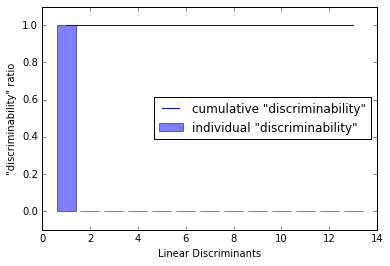

In [23]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center',label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [24]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.0102  0.024 ]
 [-0.0823 -0.5749]
 [-0.0546 -0.03  ]
 [-0.122   0.2214]
 [ 0.0062 -0.0052]
 [-0.2257 -0.2823]
 [ 0.8044  0.4656]
 [ 0.0942 -0.1366]
 [-0.0508 -0.2001]
 [-0.2398 -0.1386]
 [ 0.1122 -0.1568]
 [ 0.3914 -0.4682]
 [ 0.2062  0.028 ]]


### Projecting samples onto the new feature space (6)

투영

X'=XW

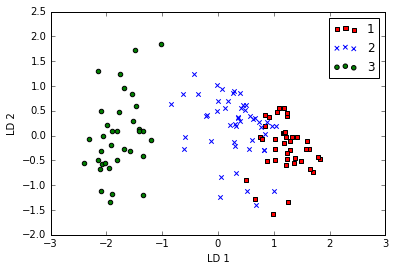

In [25]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],X_train_lda[y_train==l, 1],c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')
plt.show()

### LDA via scikit-learn

In [26]:
from sklearn.lda import LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

/Users/SungwonLyu/anaconda/lib/python3.5/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


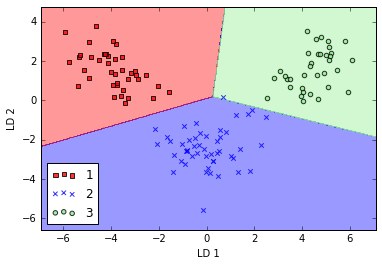

In [27]:
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

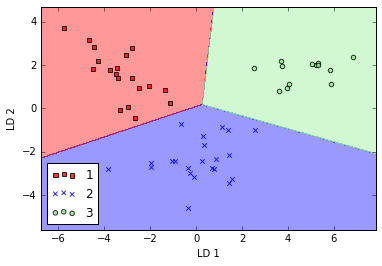

In [28]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

In [29]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    gamma: float
     Tuning parameter of the RBF kernel
    n_components: int
     Number of principal components to return
    Returns
    ------------
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
      Projected dataset
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)
    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    return X_pc


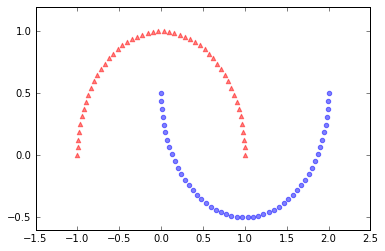

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

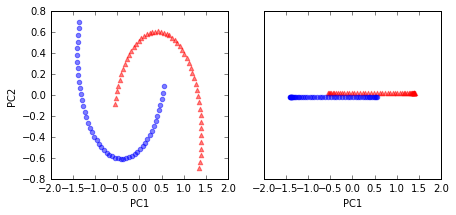

In [ ]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

In [ ]:
from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2) fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
    color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
    color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,
    color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
    color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()                     

SyntaxError: invalid syntax (<ipython-input-32-b17afb185b6f>, line 2)

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

In [ ]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
               color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
               color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02,
               color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

In [ ]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
               color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
               color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02,
               color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02,
               color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()